# 기업 정보 설립 연도 매출액

In [38]:
import mysql.connector as mysql
import pandas as pd
import folium
import requests
import googlemaps
from geopy.distance import geodesic
import numpy as np
from tqdm import tqdm
import folium
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

#database-1.c9ks828mszs7.ap-northeast-2.rds.amazonaws.com

In [62]:
remote = mysql.connect (
    host = "database-1.c9ks828mszs7.ap-northeast-2.rds.amazonaws.com",
    port = 3306,
    user = "roschool",
    password = "1234",
    database = "roschool"
)

In [63]:
cursor = remote.cursor(buffered=True)

cursor.execute("""
                SELECT foundation, ROUND(AVG(income)) as income
                FROM company_info
                WHERE income > 0 and foundation > 0
                GROUP BY foundation
                ORDER BY foundation
            """
               )


In [64]:
cursor_result = cursor.fetchall()

df = pd.DataFrame(cursor_result)

df.head()

,0,1
0,1983,322000
1,1995,1141000
2,1998,488500
3,1999,2266000
4,2000,1661987


In [65]:
df.columns = ["설립일", "매출평균(만)"]

df

,설립일,매출평균(만)
0,1983,322000
1,1995,1141000
2,1998,488500
3,1999,2266000
4,2000,1661987
5,2001,367333
6,2002,359000
7,2003,1468500
8,2004,609500
9,2005,266333


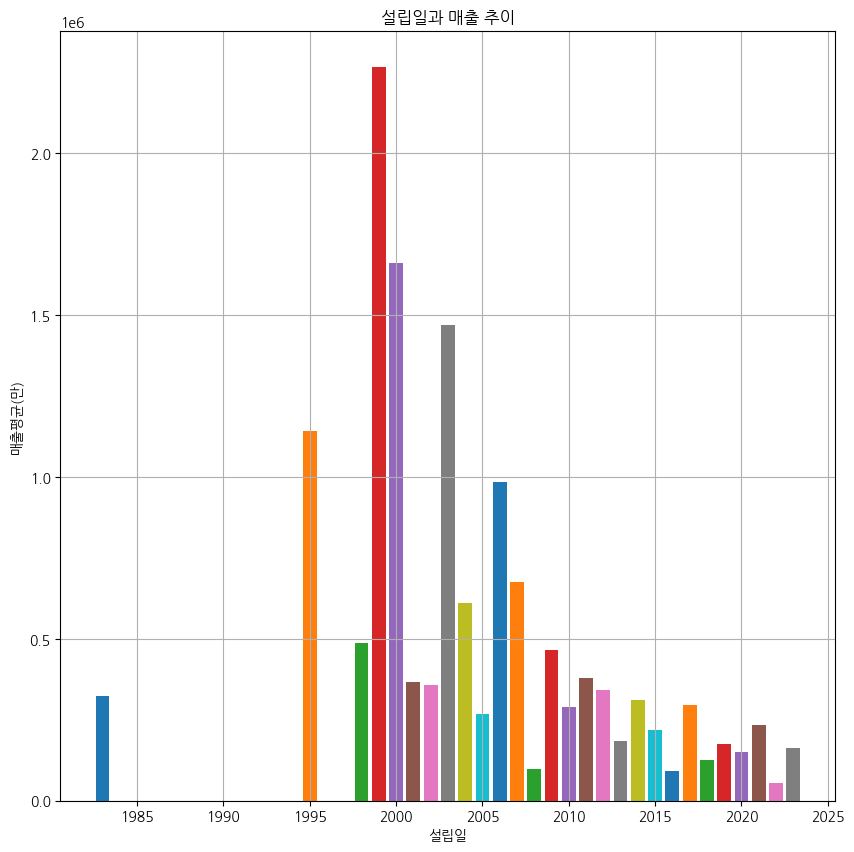

In [66]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
colors = plt.cm.tab10.colors  # 다양한 색상을 사용

# 필터링된 데이터로 그래프 그리기
plt.bar(df["설립일"], df["매출평균(만)"], color=colors[:len(df)])
plt.grid(True)
plt.xlabel("설립일")
plt.ylabel("매출평균(만)")
plt.title("설립일과 매출 추이")
plt.show()


# 다른 시각화

ConversionError: Failed to convert value(s) to axis units: array(['중소기업', '중소기업', '중소기업', '스타트업', '중소기업', '중소기업', '중소기업', '중소기업',
       '중소기업', '스타트업', '중소기업', '중소기업', '중소기업', '중소기업', '중견기업', '중소기업',
       '중소기업', '스타트업', '중소기업', '스타트업', '중소기업', '중소기업', '중소기업', '중소기업',
       '중소기업', '중소기업'], dtype=object)

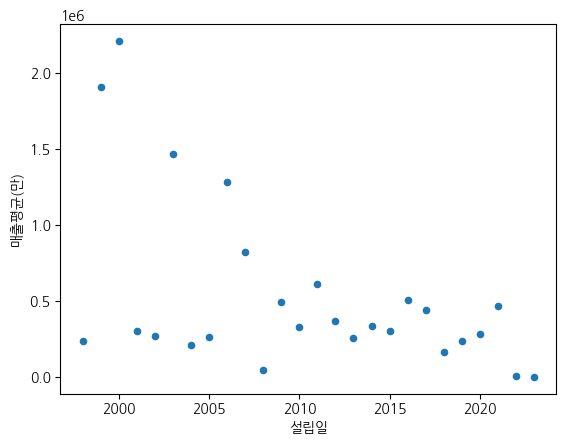

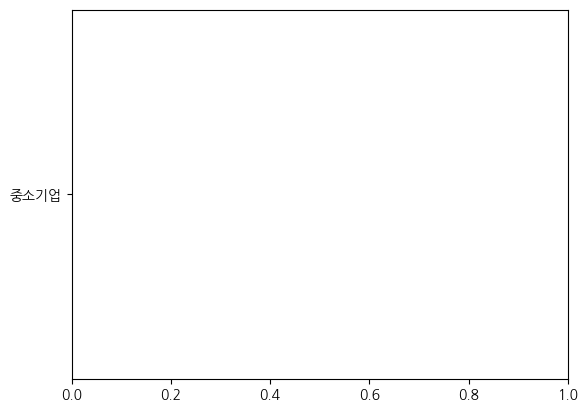

In [35]:
df.plot(x='설립일',y='매출평균(만)', kind='scatter')
plt.figure() # 도화지 생성
x = df["설립일"]
y = df["매출평균(만)"] # 타율
plt.plot(x,x2,y)

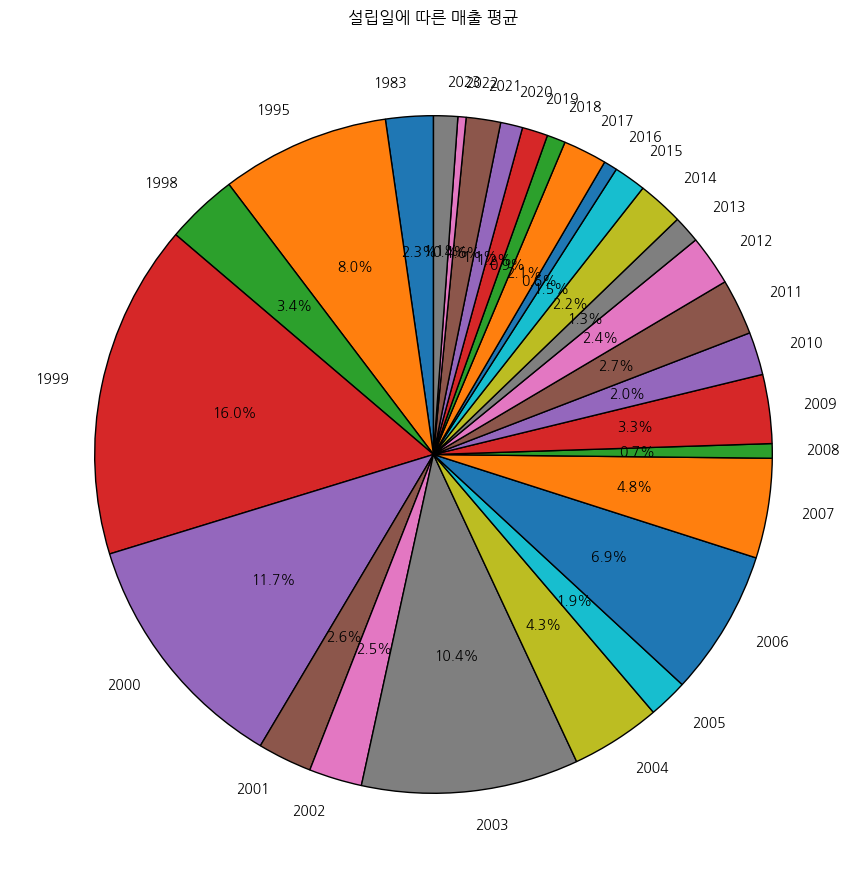

In [102]:
import matplotlib.pyplot as plt

# 파이 차트 그리기
plt.figure(figsize=(11, 11))
colors = plt.cm.tab10.colors  # 다양한 색상을 사용

# 데이터 준비
labels = df["설립일"]  # 라벨: 설립일
sizes = df["매출평균(만)"]  # 값: 매출평균

# 파이 차트
plt.pie(
    sizes,
    labels=labels,
    colors=colors[:len(df)],
    autopct='%1.1f%%',  # 퍼센트 표시
    startangle=90,      # 시작 각도 (90도에서 시작)
    wedgeprops={'edgecolor': 'black'}  # 경계선 추가
)
plt.title("설립일에 따른 매출 평균")
plt.show()


TypeError: Image data of dtype object cannot be converted to float

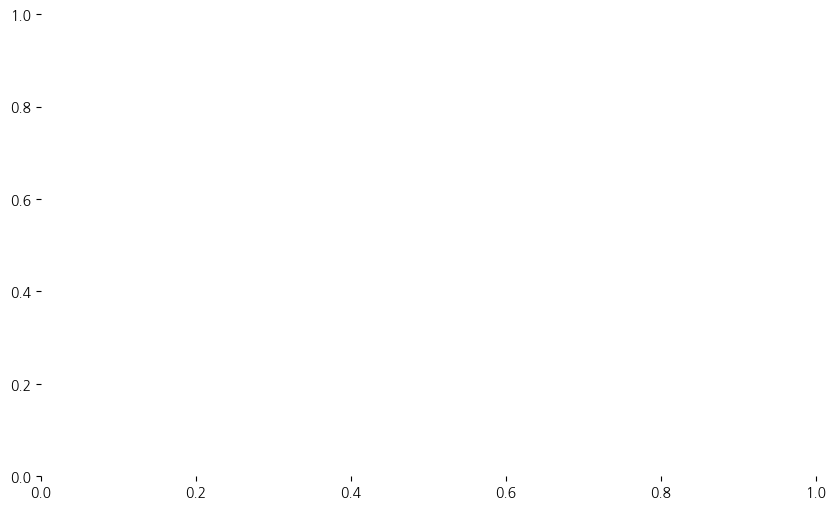

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 가상의 데이터프레임 예시 (실제 df를 사용하세요)
# df = pd.DataFrame({
#     "설립일": [2000, 2001, 2002, 2003],
#     "매출평균(만)": [100, 150, 200, 250]
# })

# 히트맵 데이터 준비
# 피벗 테이블 형태로 변환 (히트맵은 2차원 데이터를 필요로 함)
heatmap_data = pd.pivot_table(
    df,
    values="매출평균(만)",  # 히트맵 값
    index=["설립일"],      # 행: 설립일
    aggfunc='mean'         # 데이터 집계 방식
)

# 히트맵 그리기
plt.figure(figsize=(10, 6))
sns.heatmap(
    heatmap_data,
    annot=True,            # 각 셀에 값 표시
    fmt=".1f",             # 소수점 형식
    cmap="YlGnBu",         # 색상 팔레트
    linewidths=0.5,        # 셀 간 경계선
    linecolor='gray'       # 경계선 색상
)
plt.title("설립일과 매출 평균 히트맵")
plt.xlabel("매출평균(만)")
plt.ylabel("설립일")
plt.show()


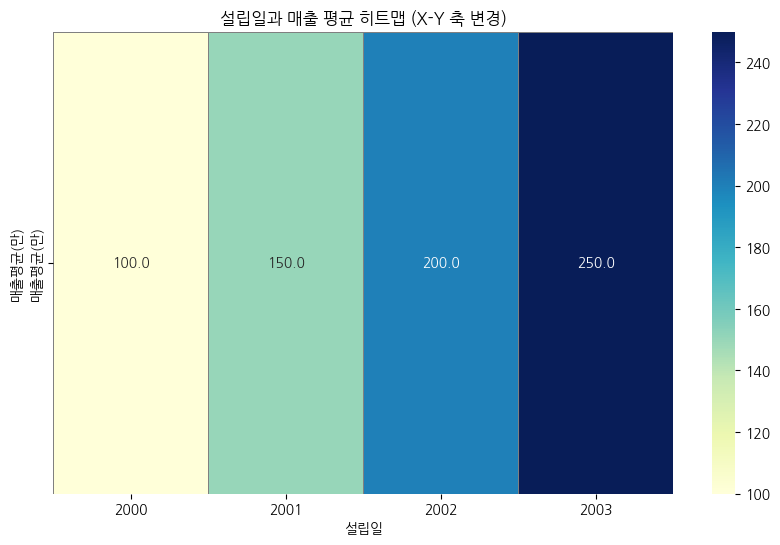

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.DataFrame(data)

# 데이터 확인 및 숫자 변환
df["매출평균(만)"] = pd.to_numeric(df["매출평균(만)"], errors="coerce")

# 피벗 테이블: X축을 '매출평균(만)', Y축을 '설립일'로 설정
heatmap_data = pd.pivot_table(
    df,
    values="매출평균(만)",  # 히트맵에 나타낼 값
    columns="설립일",       # X축: 설립일
    aggfunc="mean"          # 데이터 집계 방식
)

# 히트맵 그리기
plt.figure(figsize=(10, 6))
sns.heatmap(
    heatmap_data,
    annot=True,            # 각 셀에 값 표시
    fmt=".1f",             # 소수점 형식
    cmap="YlGnBu",         # 색상 팔레트
    linewidths=0.5,        # 셀 간 경계선
    linecolor='gray'       # 경계선 색상
)
plt.title("설립일과 매출 평균 히트맵 (X-Y 축 변경)")
plt.xlabel("설립일")
plt.ylabel("매출평균(만)")
plt.show()


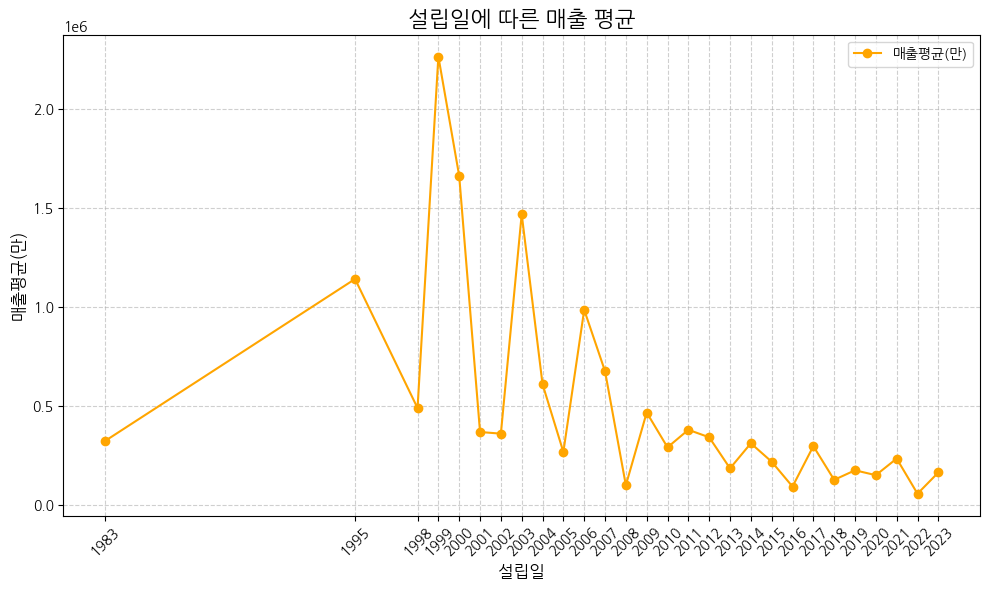

In [68]:
import matplotlib.pyplot as plt
import pandas as pd

# 꺾은선 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(df["설립일"], df["매출평균(만)"], marker='o', linestyle='-', color='orange', label='매출평균(만)')

# 그래프 꾸미기
plt.title("설립일에 따른 매출 평균", fontsize=16)
plt.xlabel("설립일", fontsize=12)
plt.ylabel("매출평균(만)", fontsize=12)
plt.xticks(df["설립일"], rotation=45)  # X축 레이블 회전
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()

# 그래프 출력
plt.show()


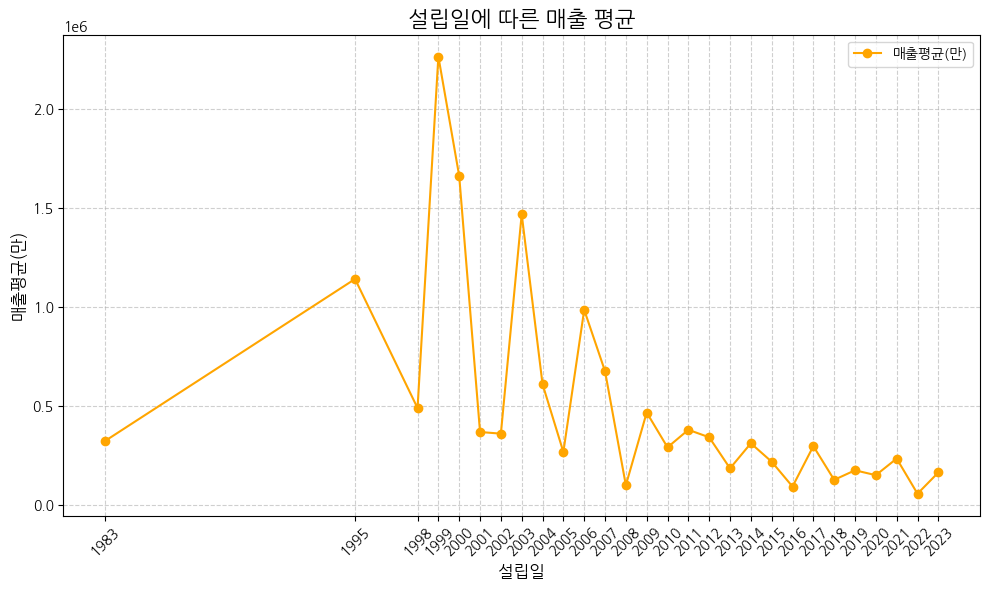

In [69]:
import matplotlib.pyplot as plt
import pandas as pd

# 꺾은선 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(df["설립일"], df["매출평균(만)"], marker='o', linestyle='-', color='orange', label='매출평균(만)')

# 그래프 꾸미기
plt.title("설립일에 따른 매출 평균", fontsize=16)
plt.xlabel("설립일", fontsize=12)
plt.ylabel("매출평균(만)", fontsize=12)
plt.xticks(df["설립일"], rotation=45)  # X축 레이블 회전
plt.grid(True, linestyle='--', alpha=0.6)

# 범례 위치 설정 (우측 상단)
plt.legend(loc="upper right")

plt.tight_layout()

# 그래프 출력
plt.show()


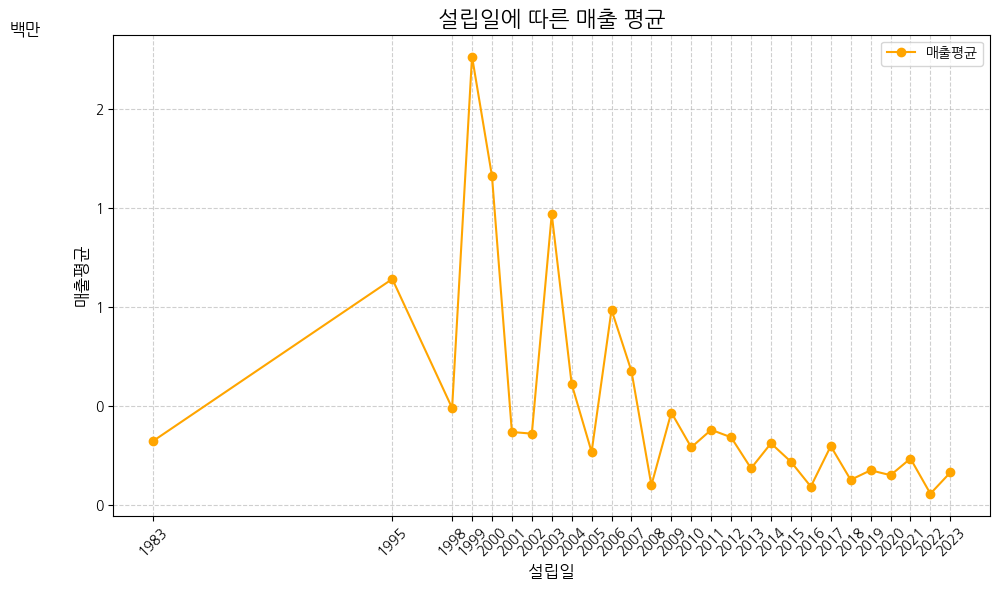

In [84]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# 꺾은선 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(df["설립일"], df["매출평균(만)"], marker='o', linestyle='-', color='orange', label='매출평균')

# 그래프 꾸미기
plt.title("설립일에 따른 매출 평균", fontsize=16)
plt.xlabel("설립일", fontsize=12)
plt.ylabel("매출평균", fontsize=12)
plt.xticks(df["설립일"], rotation=45)

# Y축 숫자 포맷을 일반 숫자로 표시
def millions_formatter(x, pos):
    return f'{int(x / 1e6)}'

plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(millions_formatter))

# Y축 상단의 1e6을 "백만"으로 변경
plt.gca().yaxis.get_offset_text().set_visible(False)  # 기본 1e6 숨기기
plt.annotate('백만', xy=(-0.1, 1), xycoords='axes fraction', fontsize=12, rotation=0, ha='center')

# 그래프 꾸미기
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc="upper right")
plt.tight_layout()

# 그래프 출력
plt.show()


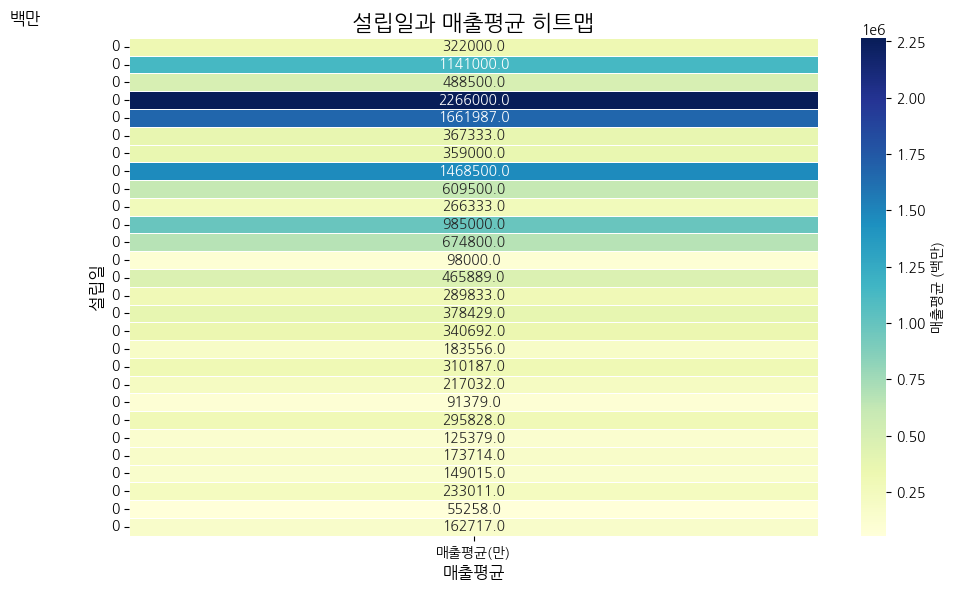

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.ticker as mticker

# 히트맵 데이터 준비 (예제)
# df는 설립일과 매출평균(만) 데이터를 포함한다고 가정합니다.
heatmap_data = pd.pivot_table(
    df,
    values="매출평균(만)",
    index=["설립일"],  # Y축
    aggfunc="mean"     # 평균값 사용
)

# 히트맵 그리기
plt.figure(figsize=(10, 6))
ax = sns.heatmap(
    heatmap_data,
    annot=True,            # 각 셀 값 표시
    fmt=".1f",             # 소수점 첫째 자리까지 표시
    cmap="YlGnBu",         # 색상 팔레트
    linewidths=0.5,        # 셀 경계선
    cbar_kws={"label": "매출평균 (백만)"}  # 컬러바 라벨
)

# Y축 숫자를 "백만" 단위로 변환
def millions_formatter(x, pos):
    return f'{int(x / 1e6)}'

ax.yaxis.set_major_formatter(mticker.FuncFormatter(millions_formatter))

# Y축 상단의 1e6을 "백만"으로 변경
ax.yaxis.get_offset_text().set_visible(False)  # 기본 1e6 숨기기
ax.annotate('백만', xy=(-0.15, 1.03), xycoords='axes fraction', fontsize=12, rotation=0, ha='center')

# 그래프 꾸미기
plt.title("설립일과 매출평균 히트맵", fontsize=16)
plt.ylabel("설립일", fontsize=12)
plt.xlabel("매출평균", fontsize=12)
plt.tight_layout()

# 그래프 출력
plt.show()


In [87]:
df["매출평균(만)"] = pd.to_numeric(df["매출평균(만)"], errors="coerce")

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   설립일      28 non-null     int64 
 1   매출평균(만)  28 non-null     object
dtypes: int64(1), object(1)
memory usage: 576.0+ bytes


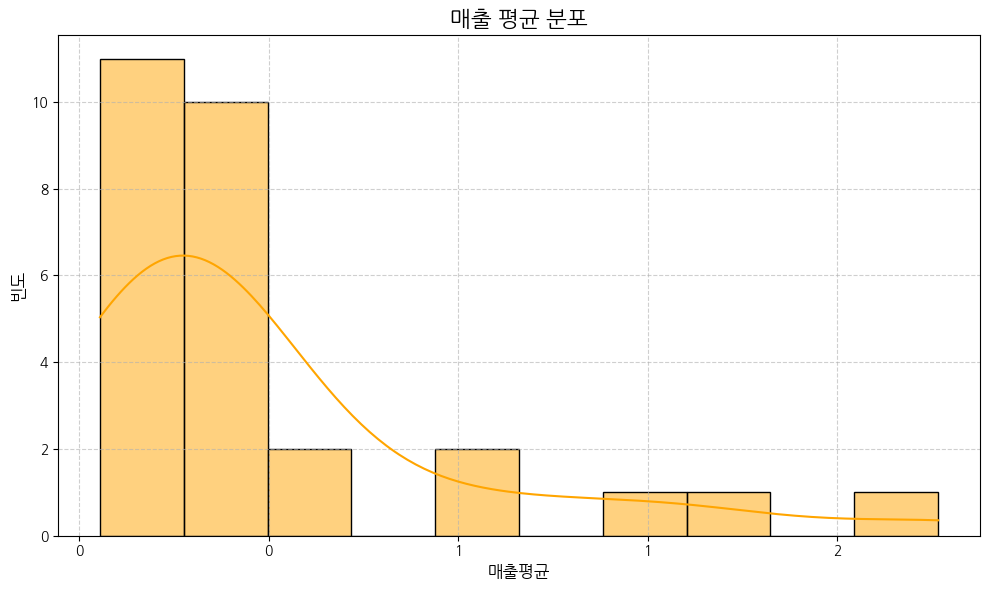

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

# 히스토그램 그리기
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df,
    x="매출평균(만)",       # X축에 표시할 데이터
    bins=10,              # 히스토그램의 막대 개수
    kde=True,             # KDE(커널 밀도 추정) 곡선 추가
    color='orange'        # 히스토그램 색상
)

# 그래프 꾸미기
plt.title("매출 평균 분포", fontsize=16)
plt.xlabel("매출평균", fontsize=12)
plt.ylabel("빈도", fontsize=12)

# Y축을 "백만" 단위로 변환
def millions_formatter(x, pos):
    return f'{int(x / 1e6)}'

plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(millions_formatter))

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# 그래프 출력
plt.show()


/tmp/ipykernel_6331/38207819.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


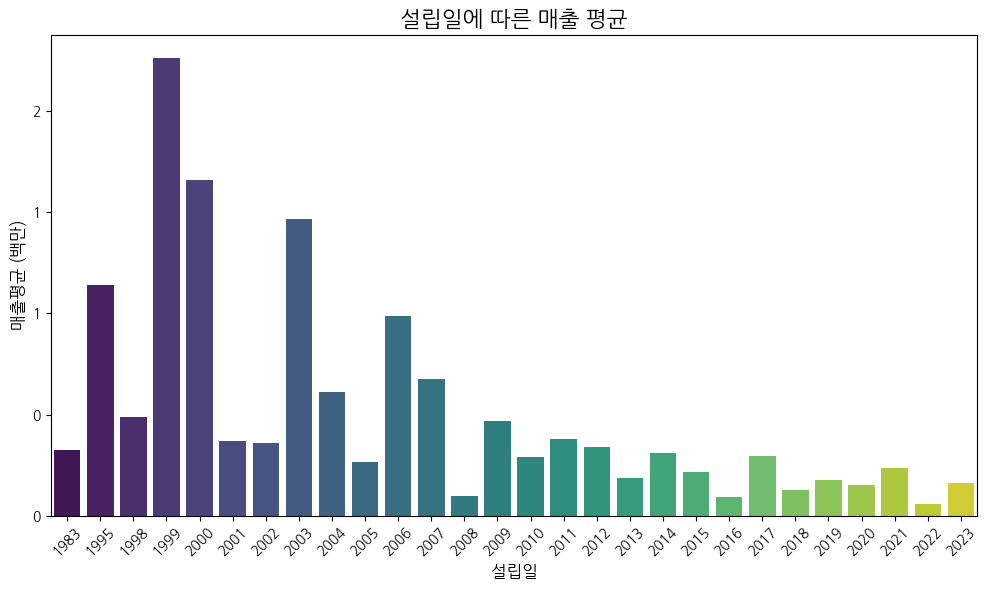

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df,
    x="설립일",             # X축: 설립일
    y="매출평균(만)",       # Y축: 매출평균
    palette="viridis"      # 색상 팔레트 (다른 색상 설정)
)

# 그래프 꾸미기
plt.title("설립일에 따른 매출 평균", fontsize=16)
plt.xlabel("설립일", fontsize=12)
plt.ylabel("매출평균 (백만)", fontsize=12)
plt.xticks(rotation=45)

# Y축을 "백만" 단위로 변환
def millions_formatter(x, pos):
    return f'{int(x / 1e6)}'

plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(millions_formatter))

# 격자 추가
# plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# 그래프 출력
plt.show()


In [74]:
company_type_cursor = remote.cursor(buffered=True)
company_type_cursor.execute("""
                            SELECT ct.type as "기업 규모", ROUND(AVG(c.income), 0) as "매출(만)"
                            FROM comp_type ct, company_info c 
                            WHERE ct.comp_type_id = c.type_id
                            AND c.income > 0
                            GROUP BY ct.type
                            """)

company_type_result = company_type_cursor.fetchall()

df_company_type_result = pd.DataFrame(company_type_result)

In [78]:
df_company_type_result.columns = ["기업분류", "평균매출"]


In [79]:
df_company_type_result

,기업분류,평균매출
0,스타트업,679417
1,중소기업,520835
2,정보없음,176357
3,중견기업,850000
4,기타,227000


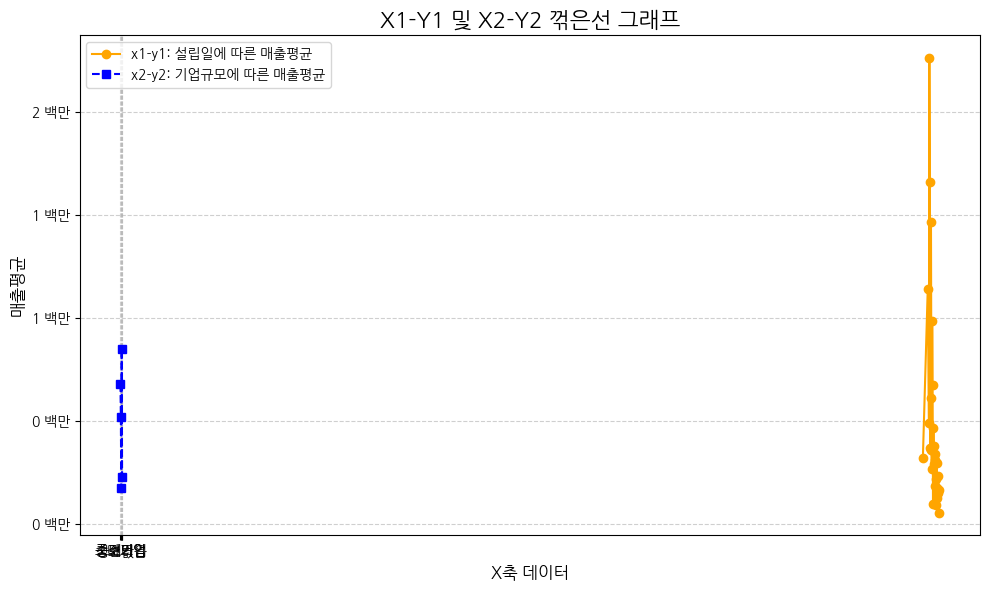

In [80]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# X축과 Y축 데이터
x1 = df["설립일"]  # 첫 번째 X축 데이터
x2 = df_company_type_result["기업분류"]  # 두 번째 X축 데이터 (예시)
y1 = df["매출평균(만)"]  # 첫 번째 Y축 데이터
y2 = df_company_type_result["평균매출"]  # 두 번째 Y축 데이터 (예시)

# 그래프 그리기
plt.figure(figsize=(10, 6))

# 첫 번째 꺾은선 그래프 (x1-y1)
plt.plot(x1, y1, marker='o', linestyle='-', color='orange', label='x1-y1: 설립일에 따른 매출평균')

# 두 번째 꺾은선 그래프 (x2-y2)
plt.plot(x2, y2, marker='s', linestyle='--', color='blue', label='x2-y2: 기업규모에 따른 매출평균')

# 그래프 꾸미기
plt.title("X1-Y1 및 X2-Y2 꺾은선 그래프", fontsize=16)
plt.xlabel("X축 데이터", fontsize=12)
plt.ylabel("매출평균", fontsize=12)

# Y축 단위 변경 (백만 단위)
def millions_formatter(x, pos):
    return f'{int(x / 1e6)} 백만'

plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(millions_formatter))

# 범례와 그리드 추가
plt.legend(loc="upper left")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# 그래프 출력
plt.show()


In [36]:
remote.close()